# Cross Validation
*Cross-validation is a step in the process of building a machine learning model which helps us ensure that our models fit the data accurately and also ensures that we do not overfit.*

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.style.use('ggplot')
%matplotlib inline

In [39]:
wine = pd.read_csv('winequality-red.csv')
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

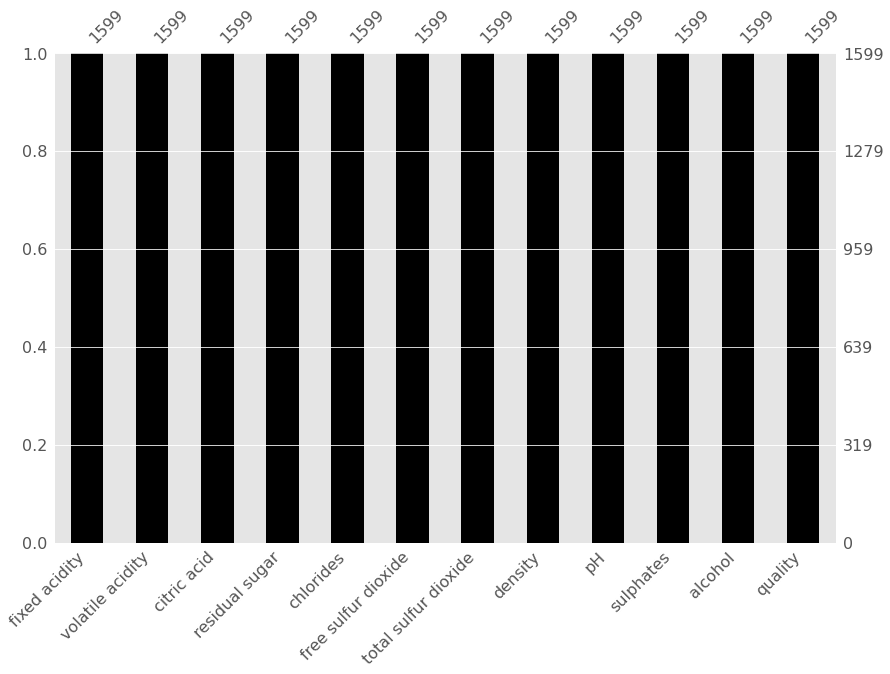

In [40]:
msno.bar(wine, figsize=(14,9), color='k')

In [41]:
wine.quality.nunique()

6

In [42]:
wine.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [43]:
wine.quality.value_counts(normalize=True)

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64

## Target mapping

In [44]:
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5,
}

wine.loc[:, 'quality'] = wine.quality.map(quality_mapping)

wine.quality.value_counts(normalize=True)

2    0.425891
3    0.398999
4    0.124453
1    0.033146
5    0.011257
0    0.006254
Name: quality, dtype: float64

## Data spliting

In [45]:
wine.shape

(1599, 12)

In [46]:
wine.describe().T

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   2.636023   0.807569  0.00000   2.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                3.00000   3.000000    5.00000

In [47]:
df = wine.copy()
df = df.sample(frac=1).reset_index(drop=True)
df_train = df.head(1000)
df_test = df.tail(599)

In [48]:
df_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.1              0.67         0.00             2.3      0.083   
1            8.0              0.18         0.37             0.9      0.049   
2            6.6              0.50         0.00             1.8      0.062   
3            8.3              0.43         0.30             3.4      0.079   
4           10.6              0.36         0.57             2.3      0.087   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 18.0                  27.0  0.99768  3.44       0.54   
1                 36.0                 109.0  0.99007  2.89       0.44   
2                 21.0                  28.0  0.99352  3.44       0.55   
3                  7.0                  34.0  0.99788  3.36       0.61   
4                  6.0                  20.0  0.99676  3.14       0.72   

   alcohol  quality  
0      9.4        2  
1     12.7        3  
2     12.3        3  
3     10.5        2  
4     11.1        4

In [49]:
df_test.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1000            9.9              0.25         0.46             1.7      0.062   
1001            7.4              0.74         0.07             1.7      0.086   
1002           10.2              0.67         0.39             1.9      0.054   
1003           10.9              0.21         0.49             2.8      0.088   
1004           10.3              0.34         0.52             2.8      0.159   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1000                 26.0                  42.0  0.99590  3.18       0.83   
1001                 15.0                  48.0  0.99502  3.12       0.48   
1002                  6.0                  17.0  0.99760  3.17       0.47   
1003                 11.0                  32.0  0.99720  3.22       0.68   
1004                 15.0                  75.0  0.99980  3.18       0.64   

      alcohol  quality  
1000     10.6        3  
1001     10.0        2  
1002     10.0        2  
1003     11.7        3  
1004      9.4        2

In [50]:
feature_cols = df.columns[:-1].tolist()
feature_cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [14]:
from sklearn import tree
from sklearn import metrics

clf = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(df_train[feature_cols], df_train.quality)

DecisionTreeClassifier(max_depth=3, random_state=42)

## Accuracy

In [15]:
train_pred = clf.predict(df_train[feature_cols])
test_pred = clf.predict(df_test[feature_cols])

train_acc = metrics.accuracy_score(df_train.quality, train_pred)
test_acc = metrics.accuracy_score(df_test.quality, test_pred)

print(f'Train Accuracy: {train_acc.round(3)}')
print(f'Test Accuracy: {test_acc.round(3)}')

Train Accuracy: 0.592
Test Accuracy: 0.576


### Increase max_depth

In [17]:
clf = tree.DecisionTreeClassifier(max_depth=7, random_state=42)
clf.fit(df_train[feature_cols], df_train.quality)

train_pred = clf.predict(df_train[feature_cols])
test_pred = clf.predict(df_test[feature_cols])

train_acc = metrics.accuracy_score(df_train.quality, train_pred)
test_acc = metrics.accuracy_score(df_test.quality, test_pred)

print(f'Train Accuracy: {train_acc.round(3)}')
print(f'Test Accuracy: {test_acc.round(3)}')

Train Accuracy: 0.748
Test Accuracy: 0.588


## max_depth vs accuracy plotting

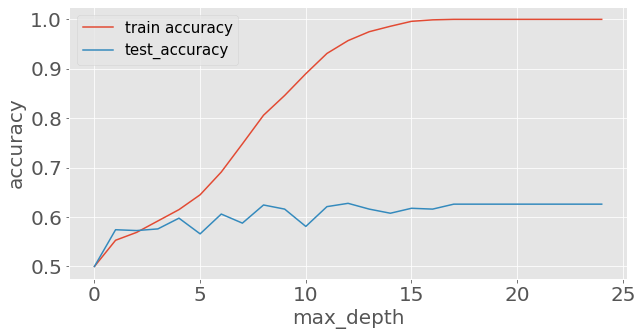

In [18]:
import matplotlib

matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

# initialize lists to store accuracies
# for training and test data
# we start with 50% accuracy
train_accuracies = [.5]
test_accuracies = [.5]

for depth in range(1, 25):
  clf = tree.DecisionTreeClassifier(max_depth=depth, random_state=42)
  clf.fit(df_train[feature_cols], df_train.quality)

  train_pred = clf.predict(df_train[feature_cols])
  test_pred = clf.predict(df_test[feature_cols])

  train_acc = metrics.accuracy_score(df_train.quality, train_pred)
  test_acc = metrics.accuracy_score(df_test.quality, test_pred)

  train_accuracies.append(train_acc)
  test_accuracies.append(test_acc)


# Plotting acc vs max_depth
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='train accuracy')
plt.plot(test_accuracies, label='test_accuracy')
plt.legend(loc='upper left', prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel('max_depth', size=20)
plt.ylabel('accuracy', size=20)
plt.show()

##  k-fold cross-validation

In [19]:
'''
# Training data is in a CSV file called train.csv
df = pd.read_csv("train.csv")

# we create a new column called kfold and fill it with -1
df["kfold"] = -1

# the next step is to randomize the rows of the data
df = df.sample(frac=1).reset_index(drop=True)

# initiate the kfold class from model_selection module
kf = model_selection.KFold(n_splits=5)

# fill the new kfold column
for fold, (trn_, val_) in enumerate(kf.split(X=df)):
    df.loc[val_, 'kfold'] = fold
    
# save the new csv with kfold column
df.to_csv("train_folds.csv", index=False)
'''

## stratified k-fold cross-validation


In [ ]:
'''
# Training data is in a csv file called train.csv
df = pd.read_csv("train.csv")

# we create a new column called kfold and fill it with -1
df["kfold"] = -1

# the next step is to randomize the rows of the data
df = df.sample(frac=1).reset_index(drop=True)

# fetch targets
y = df.target.values

# initiate the kfold class from model_selection module
kf = model_selection.StratifiedKFold(n_splits=5)

# fill the new kfold column
for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
    df.loc[v_, 'kfold'] = f
    
# save the new csv with kfold column
df.to_csv("train_folds.csv", index=False)
'''

## Distribution of wine labels

Text(0, 0.5, 'count')

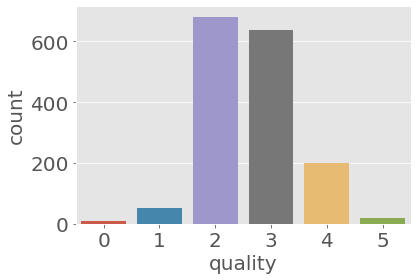

In [22]:
b = sns.countplot(x='quality', data=df)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)


## Hold-out based validation
Suppose we have 1 million samples. A 5 fold cross-validation would mean training on 800k samples and validating on 200k. Depending on which algorithm we choose, training and even validation can be very expensive for a dataset which is of this size. In these cases, we can opt for a **hold-out based validation**. The process for creating the hold-out remains the same as stratified k-fold. For a dataset which has 1 million samples, we can create ten folds instead of 5 and keep one of those folds as hold-out. This means we will have 100k samples in the holdout, and we will always calculate loss, accuracy and other metrics on this set and train on 900k samples.

## Regression problems

The good thing about regression problems is that we can use all the cross-validation techniques mentioned above for regression problems except for stratified k-fold. That is we cannot use stratified k-fold directly, but there are ways to change the problem a bit so that we can use stratified k-fold for regression problems. Mostly, simple k-fold cross-validation works for any regression problem. However, if you see that the distribution of targets is not consistent, you can use stratified k-fold.  

To use stratified k-fold for a regression problem, we have first to divide the target into bins, and then we can use stratified k-fold in the same way as for classification problems. There are several choices for selecting the appropriate number of bins. If you have a lot of samples( > 10k, > 100k), then you don’t need to care about the number of bins. Just divide the data into 10 or 20 bins. If you do not have a lot of samples, you can use a simple rule like Sturge’s Rule to calculate the appropriate number of bins.  

Sturge’s rule:
## $$ Number of Bins = 1 + log_2(N)$$

In [23]:
from sklearn import datasets
from sklearn import model_selection

X, y = datasets.make_regression(n_samples=15000, n_features=100, n_targets=1)
# create a dataframe out of our numpy arrays
df = pd.DataFrame(X, columns=[f"f_{i}" for i in range(X.shape[1])])
df.loc[:, "target"] = y

In [24]:
df.head()

f_0       f_1       f_2       f_3       f_4       f_5       f_6  \
0  0.969082 -0.628474  0.551524  0.166741  0.495408  1.345146  1.230696   
1  1.683823 -1.262182  0.039525 -1.893201  0.227543 -1.012335  0.679968   
2 -1.874132  0.246792 -0.860798  0.371781  0.329553  0.490821  1.172586   
3 -0.879941  1.696314  0.415282  0.105674 -1.242359  0.503886 -0.380646   
4  0.289766 -0.388004 -3.567041  1.012491 -1.204293 -0.314216  0.566314   

        f_7       f_8       f_9  ...      f_91      f_92      f_93      f_94  \
0 -0.961330  0.585557 -0.344090  ...  0.751939  0.394011  1.119726  1.705838   
1 -1.728565  0.985184 -0.237114  ... -0.118186 -0.010804 -0.134352 -1.542715   
2  0.920034  1.015826 -1.080585  ... -0.425482 -0.655941  0.059973 -0.368964   
3  1.580639 -0.332311 -1.509378  ...  1.389653 -0.209110 -0.385995 -0.904307   
4  1.103898 -0.935854 -0.183706  ...  0.382022  0.047918  1.054039 -0.332459   

       f_95      f_96      f_97      f_98      f_99     target  
0  0.466060 -0.708995  0.405522  0.321660 -0.228668 -52.573277  
1  1.840015 -0.519717 -0.300956  0.508951  0.928729 -83.004461  
2 -0.319282 -0.678989 -0.176402 -1.480349 -0.955782  -7.396433  
3 -1.896578 -0.003597  2.597412 -0.129171 -0.461875  -8.580691  
4  0.694603  0.114965  1.462738 -1.573906 -0.447210 -98.303384  

[5 rows x 101 columns]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Columns: 102 entries, f_0 to kfold
dtypes: float64(101), int64(1)
memory usage: 11.7 MB


In [36]:
def create_folds(data):
  # we create a new column called kfold and fill it with -1
  data["kfold"] = -1
  
  # the next step is to randomize the rows of the data
  data = data.sample(frac=1).reset_index(drop=True)
  # calculate the number of bins by Sturge's rule
  # I take the floor of the value, you can also
  # just round it
  num_bins = int(np.floor(1 + np.log2(len(data))))
  # bin targets
  data.loc[:, "bins"] = pd.cut(data["target"], bins=num_bins, labels=False)

  # initiate the kfold class from model_selection module
  kf = model_selection.StratifiedKFold(n_splits=5)

  # fill the new kfold column
  # note that, instead of targets, we use bins!
  for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
    data.loc[v_, 'kfold'] = f

  # drop the bins column
  data = data.drop("bins", axis=1)
  # return dataframe with folds
  return data



In [37]:
create_folds(df)

f_0       f_1       f_2       f_3       f_4       f_5       f_6  \
0      2.295731  0.129578  0.815959 -0.528153  1.789867 -0.735285  0.742722   
1      0.510270 -0.788346 -0.524748 -0.710176  2.025424  0.897132 -1.719833   
2     -0.707359  0.811555 -0.803602  0.527447  1.212738 -0.681499 -0.851001   
3      1.191187  0.070919 -0.674175 -1.333624  0.469697 -1.855239 -0.984066   
4     -0.665091 -1.809493 -1.931238 -1.678594 -0.096410  0.655475 -0.114933   
...         ...       ...       ...       ...       ...       ...       ...   
14995  1.283194 -0.374860  1.132559  1.404669  0.280279 -2.250295 -0.021100   
14996 -0.854900 -1.149545  1.312784  1.379844  1.020459 -0.110804 -0.123815   
14997 -2.087455  0.788879 -1.187558 -0.036157  0.344629 -1.017407  1.314480   
14998  1.726094 -0.379586 -0.098278 -0.696316 -0.673046  0.100026  1.112450   
14999  0.601154 -0.060143 -1.280142 -0.106454  1.815577  0.184291  0.945893   

            f_7       f_8       f_9  ...      f_92      f_93      f_94  \
0     -0.266719 -0.640800  0.048266  ... -1.422970 -0.628442 -1.435357   
1     -0.325975  1.456901 -1.833818  ...  0.821909  0.244512  0.109023   
2     -0.261004  0.857540 -1.856336  ...  1.471679  0.439390 -1.404425   
3     -0.434797  2.219042  1.365031  ...  0.728534  0.405025  0.833979   
4     -0.059304  1.762297  0.609798  ...  0.504669 -0.405584  0.752687   
...         ...       ...       ...  ...       ...       ...       ...   
14995  0.218152 -0.293821 -0.133258  ...  1.218158  0.610222  0.695320   
14996  1.089834 -0.945351  1.573328  ...  0.124301  0.770820  1.476390   
14997  0.689195 -0.028283  1.820484  ... -0.468662  1.103473  0.367832   
14998  1.706146 -1.072177  1.454512  ...  0.325763  1.566326 -0.213116   
14999  1.870434 -1.002956 -0.357570  ... -1.300393  1.642555 -0.426351   

           f_95      f_96      f_97      f_98      f_99      target  kfold  
0      1.541363 -0.840699 -2.510224  0.594063  1.581558 -146.389599      0  
1     -0.288918 -0.347145 -0.146453 -0.137452 -0.032135 -109.496525      0  
2      1.417336 -0.719792  1.457944  0.397442  1.391155  -34.010805      0  
3     -0.581206 -0.784227 -2.147333  0.494742 -2.262681   24.438438      0  
4     -0.424409 -0.848693 -0.152189 -0.032701 -1.438211  -14.129426      0  
...         ...       ...       ...       ...       ...         ...    ...  
14995 -1.093260  0.978079 -0.842830 -0.712269 -3.194989  -37.226775      4  
14996  0.569732  0.367967 -0.328049  0.905630 -0.065704 -103.888563      4  
14997 -0.756382 -1.247186 -0.792740 -1.209633  2.851134  -33.104385      4  
14998 -1.046905 -0.433187  1.536686  0.327521 -0.297150  222.965813      4  
14999  0.016690  1.245400 -0.419294  0.228228  0.252665   73.096397      4  

[15000 rows x 102 columns]

In [51]:
df_train.shape

(1000, 12)

In [52]:
df_test.shape

(599, 12)

In [53]:
df_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.1              0.67         0.00             2.3      0.083   
1            8.0              0.18         0.37             0.9      0.049   
2            6.6              0.50         0.00             1.8      0.062   
3            8.3              0.43         0.30             3.4      0.079   
4           10.6              0.36         0.57             2.3      0.087   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 18.0                  27.0  0.99768  3.44       0.54   
1                 36.0                 109.0  0.99007  2.89       0.44   
2                 21.0                  28.0  0.99352  3.44       0.55   
3                  7.0                  34.0  0.99788  3.36       0.61   
4                  6.0                  20.0  0.99676  3.14       0.72   

   alcohol  quality  
0      9.4        2  
1     12.7        3  
2     12.3        3  
3     10.5        2  
4     11.1        4

In [54]:
df_test.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1000            9.9              0.25         0.46             1.7      0.062   
1001            7.4              0.74         0.07             1.7      0.086   
1002           10.2              0.67         0.39             1.9      0.054   
1003           10.9              0.21         0.49             2.8      0.088   
1004           10.3              0.34         0.52             2.8      0.159   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1000                 26.0                  42.0  0.99590  3.18       0.83   
1001                 15.0                  48.0  0.99502  3.12       0.48   
1002                  6.0                  17.0  0.99760  3.17       0.47   
1003                 11.0                  32.0  0.99720  3.22       0.68   
1004                 15.0                  75.0  0.99980  3.18       0.64   

      alcohol  quality  
1000     10.6        3  
1001     10.0        2  
1002     10.0        2  
1003     11.7        3  
1004      9.4        2

In [62]:
def create_folds(data, target):
  data['kfold'] = -1
  data = data.sample(frac=1).reset_index(drop=True)
  y = data[target].values
  kf = model_selection.StratifiedKFold(n_splits=5)

  for f, (t_, v_) in enumerate(kf.split(X=data, y=y)):
    data.loc[v_, 'kfold'] = f
  
  data.to_csv('train_folds.csv', index=False)


In [63]:
create_folds(df, 'quality')

In [64]:
df = pd.read_csv('train_folds.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           10.2             0.240         0.49             2.4      0.075   
1           12.8             0.615         0.66             5.8      0.083   
2            8.7             0.290         0.52             1.6      0.113   
3            8.3             0.625         0.20             1.5      0.080   
4           10.8             0.320         0.44             1.6      0.063   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 10.0                  28.0   0.9978  3.14       0.61   
1                  7.0                  42.0   1.0022  3.07       0.73   
2                 12.0                  37.0   0.9969  3.25       0.58   
3                 27.0                 119.0   0.9972  3.16       1.12   
4                 16.0                  37.0   0.9985  3.22       0.78   

   alcohol  quality  kfold  
0     10.4        2      0  
1     10.0        4      0  
2      9.5        2      0  
3      9.1        1      0  
4     10.0        3      0

In [65]:
df.kfold.value_counts()

0    320
1    320
2    320
3    320
4    319
Name: kfold, dtype: int64

In [66]:
useful_features = [c for c in df.columns if c not in ('quality', 'kfold')]
df_test = df_test[useful_features]

In [70]:
from sklearn import ensemble
from xgboost import XGBClassifier
from sklearn import metrics

In [76]:
final_predictions_rf = []

for fold in range(5):
    xtrain =  df[df.kfold != fold].reset_index(drop=True)
    xvalid = df[df.kfold == fold].reset_index(drop=True)
    xtest = df_test.copy()

    ytrain = xtrain.quality
    yvalid = xvalid.quality
    
    xtrain = xtrain[useful_features]
    xvalid = xvalid[useful_features]
    
    
    
    model = ensemble.RandomForestClassifier(random_state=fold, n_jobs=-1)
    model.fit(xtrain, ytrain)
    preds_valid = model.predict(xvalid)
    test_preds = model.predict(xtest)
    final_predictions_rf.append(test_preds)
    print(fold, metrics.accuracy_score(yvalid, preds_valid))

0 0.65625
1 0.69375
2 0.684375
3 0.70625
4 0.6896551724137931


In [77]:
final_predictions_xgb = []

for fold in range(5):
    xtrain =  df[df.kfold != fold].reset_index(drop=True)
    xvalid = df[df.kfold == fold].reset_index(drop=True)
    xtest = df_test.copy()

    ytrain = xtrain.quality
    yvalid = xvalid.quality
    
    xtrain = xtrain[useful_features]
    xvalid = xvalid[useful_features]
    
    
    
    model = XGBClassifier(random_state=fold, n_jobs=-1)
    model.fit(xtrain, ytrain)
    preds_valid = model.predict(xvalid)
    test_preds = model.predict(xtest)
    final_predictions_xgb.append(test_preds)
    print(fold, metrics.accuracy_score(yvalid, preds_valid))

0 0.59375
1 0.64375
2 0.634375
3 0.671875
4 0.6300940438871473


In [79]:
final_predictions_histgrad = []

for fold in range(5):
    xtrain =  df[df.kfold != fold].reset_index(drop=True)
    xvalid = df[df.kfold == fold].reset_index(drop=True)
    xtest = df_test.copy()

    ytrain = xtrain.quality
    yvalid = xvalid.quality
    
    xtrain = xtrain[useful_features]
    xvalid = xvalid[useful_features]
    
    
    
    model = ensemble.HistGradientBoostingClassifier(random_state=fold)
    model.fit(xtrain, ytrain)
    preds_valid = model.predict(xvalid)
    test_preds = model.predict(xtest)
    final_predictions_histgrad.append(test_preds)
    print(fold, metrics.accuracy_score(yvalid, preds_valid))

0 0.615625
1 0.6625
2 0.66875
3 0.721875
4 0.670846394984326


In [80]:
preds_histgrad = np.mean(np.column_stack(final_predictions_histgrad), axis=1)
preds_histgrad

array([3.2, 2. , 2.2, 3. , 2. , 3. , 2.2, 2.8, 3. , 2.8, 1.2, 3.8, 2. ,
       2. , 3.8, 2. , 2.2, 4. , 1.2, 3. , 4. , 2. , 3.8, 2. , 3.8, 3. ,
       2. , 4. , 2. , 2. , 3. , 2.2, 2. , 3. , 2. , 4. , 2. , 2. , 4. ,
       2. , 3. , 2.8, 3. , 3. , 2. , 3. , 4. , 2. , 4. , 4. , 2. , 3. ,
       4. , 3. , 4. , 3. , 4. , 3. , 2. , 2. , 2. , 3. , 2. , 4.6, 3.2,
       3. , 2. , 2.8, 3.2, 2. , 2. , 3. , 2. , 2.8, 3.8, 2. , 3.8, 1.2,
       2. , 3. , 4. , 3. , 2. , 2.8, 3. , 3. , 2.8, 4. , 3. , 3. , 1.2,
       2. , 3.8, 3. , 2. , 4. , 2. , 3. , 2. , 3.8, 2.8, 2.2, 2. , 2. ,
       2. , 3. , 3. , 3. , 3. , 2. , 4. , 1.2, 3.8, 2. , 2. , 4. , 3. ,
       3.6, 4. , 2.8, 3.8, 3. , 3. , 2. , 3.2, 3. , 2. , 4. , 2. , 4.8,
       3. , 3. , 3. , 2.8, 3.2, 2. , 2. , 2.2, 2. , 2. , 2. , 4. , 3. ,
       3. , 3.2, 2. , 3. , 2. , 3. , 2. , 2.8, 2. , 3.8, 3. , 2.8, 2. ,
       1.2, 3. , 2. , 2.2, 3. , 3. , 2.8, 4. , 2. , 2. , 3. , 2. , 3. ,
       1.4, 2. , 2.8, 2. , 2.8, 2. , 2.2, 2. , 2. , 2.2, 2. , 2.